In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#need Ngl for Charlie's function to work, but can't seem to import correctly. May need to change environment
#import Ngl
import esmlab

import warnings
warnings.filterwarnings("ignore")
#note: Dan uses "import glob" -- glob handles wildcards better than xarray for reading in multiple files

In [6]:
import intake

In [7]:
catalog = intake.open_esm_datastore("/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip6.json")
catalog.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,hfss,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,rsus,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,ts,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...


In [8]:
test_sr = catalog.search(experiment_id=['historical'], variable_id='co2')

In [9]:
test_sr.unique('source_id')

{'source_id': {'count': 10,
  'values': ['BCC-CSM2-MR',
   'BCC-ESM1',
   'CESM2',
   'CESM2-FV2',
   'CESM2-WACCM',
   'CESM2-WACCM-FV2',
   'CNRM-ESM2-1',
   'GFDL-ESM4',
   'MIROC-ES2L',
   'MRI-ESM2-0']}}

In [10]:
#don't really understand this output
test_sr.unique('member_id')

{'member_id': {'count': 16,
  'values': ['r10i1p1f1',
   'r11i1p1f1',
   'r1i1p1f1',
   'r1i1p1f2',
   'r2i1p1f1',
   'r2i1p1f2',
   'r3i1p1f1',
   'r3i1p1f2',
   'r4i1p1f1',
   'r4i1p1f2',
   'r5i1p1f1',
   'r5i1p1f2',
   'r6i1p1f1',
   'r7i1p1f1',
   'r8i1p1f1',
   'r9i1p1f1']}}

### Reading catalog to load CO2 values for CMIP6 models
Multiple configurations of BCC and CESM available. Choosing one narrows models to 4.
Difficult to tell how many models have multiple ensemble members, so only using first member

In [11]:
table_id = 'Amon'
var = 'co2'
# note that there are different numbers of model output available depending on options used for source_id and member_id
# should I consider using multiple ensemble members per model? multiple model configurations per model?
#member_id = ["r1i1p1f1","r2i1p1f1","r3i1p1f1","r4i1p1f1","r5i1p1f1","r6i1p1f1"]
# note that MIROC doesn't show up here because it's member_id = r1i2p1f1. Not sure why this is numbered differently
cat = catalog.search(experiment_id=['historical'], variable_id=var,
#                        source_id=test_sr.unique('source_id')['source_id']['values'], 
                        source_id=['CESM2','BCC-ESM1','BCC-CSM2-MR','MRI-ESM2-0','GFDL-ESM4'], 
#                        table_id=table_id, member_id =member_id)
                        table_id=table_id, member_id ="r1i1p1f1")

In [12]:
cat.unique('source_id')['source_id']['values']

['BCC-CSM2-MR', 'BCC-ESM1', 'CESM2', 'GFDL-ESM4', 'MRI-ESM2-0']

In [13]:
cat.unique('member_id')['member_id']['values']

['r1i1p1f1']

In [14]:
cat.unique('grid_label')

{'grid_label': {'count': 2, 'values': ['gn', 'gr1']}}

### Converting data to dictionary

In [15]:
co2_ds = cat.to_dataset_dict()

Dataset(s):   0%|                                        | 0/5 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|████████████████████████████████| 5/5 [00:10<00:00,  2.12s/it]


In [16]:
co2_ds.keys()

dict_keys(['CMIP.BCC.BCC-ESM1.historical.Amon.gn', 'CMIP.NCAR.CESM2.historical.Amon.gn', 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1', 'CMIP.MRI.MRI-ESM2-0.historical.Amon.gn', 'CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn'])

### Get the fixed variables output, only available for historical simulations (gridcell area, landfrac)


In [ ]:
sr_fx_ctrl_vars = catalog.search(table_id = ['fx'], source_id = cat.unique('source_id')['source_id']['values'], 
                                 member_id = cat.unique('member_id')['member_id']['values'], 
                                 experiment_id = 'historical', variable_id = ['areacella', 'sftlf'])

In [ ]:
sr_fx_ctrl_vars.unique('grid_label')

In [ ]:
fx_ds = sr_fx_ctrl_vars.to_dataset_dict()

In [ ]:
#what happened to BCC? Doesn't seem to have fx (also checked /glade/collections/cmip/CMIP6/CMIP/BCC and online archive)
fx_ds.keys()

###   
### Starting data analysis
###   

In [17]:
for sim_name, data in co2_ds.items():
# set_coords based on M. Long's suggestion so that subtraction not applied to coordinate variables
# works on on datasets, but not on the dictionary.
    data    = data.set_coords(['time_bnds', 'lat_bnds', 'lon_bnds'])
#    datamax = data.resample(time="Y").max()
#    datamin = data.resample(time="Y").min()
#    co2amp  = datamax.co2 - datamin.co2
    co2amp  = data.resample(time="Y").max() - data.resample(time="Y").min()
    print(co2amp)
    co2_ds[sim_name] = co2amp

<xarray.Dataset>
Dimensions:    (lat: 64, lon: 128, member_id: 1, plev: 19, time: 165)
Coordinates:
  * time       (time) object 1850-12-31 00:00:00 ... 2014-12-31 00:00:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
Data variables:
    co2        (time, member_id, plev, lat, lon) float32 dask.array<chunksize=(1, 1, 19, 64, 128), meta=np.ndarray>
<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 1, plev: 19, time: 165)
Coordinates:
  * time       (time) object 1850-12-31 00:00:00 ... 2014-12-31 00:00:00
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
  * lat        (lat) float64 -90.0 -89.0

In [ ]:
# Note: This doesn't work due to calendar mismatches.
# See example here for reading in a dataset: https://geocat-examples.readthedocs.io/en/latest/gallery/XY/NCL_xy_18.html#sphx-glr-gallery-xy-ncl-xy-18-py
# Not sure how to do this for reading in a dictionary

#for amp_name, amp in co2_ds.items():
#    amp_stnd = amp.sel(time=slice('1850','2014')) - amp.sel(time=slice('1850'))

### Weighting functions from Matt Long
#### Grid cell area is not available for all models, so need to use sin weighting functions

In [ ]:
#From Matt Long:
def infer_lat_name(ds): 
    lat_names = ['latitude', 'lat']
    for n in lat_names:
        if n in ds:
            return n
    raise ValueError('could not determine lat name')    


def infer_lon_name(ds):
    lon_names = ['longitude', 'lon']
    for n in lon_names:
        if n in ds:
            return n
    raise ValueError('could not determine lon name')

In [ ]:
#Also from Matt Long:
def lat_weights_regular_grid(lat):
    """
    Generate latitude weights for equally spaced (regular) global grids.
    Weights are computed as sin(lat+dlat/2)-sin(lat-dlat/2) and sum to 2.0.
    """  
    dlat = np.abs(np.diff(lat))
    np.testing.assert_almost_equal(dlat, dlat[0])
    w = np.abs(np.sin(np.radians(lat + dlat[0] / 2.)) - np.sin(np.radians(lat - dlat[0] / 2.)))

    if np.abs(lat[0]) > 89.9999:
        w[0] = np.abs(1. - np.sin(np.radians(np.pi / 2 - dlat[0])))

    if np.abs(lat[-1]) > 89.9999:
        w[-1] = np.abs(1. - np.sin(np.radians(np.pi / 2 - dlat[0])))

    return w

In [ ]:
#Also from Matt Long:
def compute_grid_area(ds, check_total=True):
    """Compute the area of grid cells."""
   
    radius_earth = 6.37122e6 # m, radius of Earth
    area_earth = 4.0 * np.pi * radius_earth**2 # area of earth [m^2]e
   
    lon_name = infer_lon_name(ds)      
    lat_name = infer_lat_name(ds)        
   
    weights = lat_weights_regular_grid(ds[lat_name])
    area = weights + 0.0 * ds[lon_name] # add 'lon' dimension
    area = (area_earth / area.sum(dim=(lat_name, lon_name))) * area
   
    if check_total:
        np.testing.assert_approx_equal(np.sum(area), area_earth)
       
    return xr.DataArray(area, dims=(lat_name, lon_name), attrs={'units': 'm^2', 'long_name': 'area'})

### Some examples from Charlie

In [ ]:
def get_gridcell_edges(lat, lon):
    IM = lon.shape[0]
    JM = lat.shape[0]
    #
    lat_edges = np.zeros(JM+1)
    lon_edges = np.zeros(IM+1)
    #
    lat_edges[0] = max(lat[0] - (lat[1] - lat[0]) / 2., -90.)
    lat_edges[JM] = min(lat[JM-1] + (lat[JM-1] - lat[JM-2]) / 2., 90.)
    for j in range(1,JM):
        lat_edges[j] = (lat[j] + lat[j-1])/2.
    #    
    lon_edges[0] = lon[0] - (lon[1] - lon[0]) / 2.
    lon_edges[IM] = lon[IM-1] + (lon[IM-1] - lon[IM-2]) / 2.
    for i in range(1,IM):
        lon_edges[i] = (lon[i] + lon[i-1])/2.
    #
    return lat_edges, lon_edges

In [ ]:
def gridcell_areas(lat, lon, mask=None, radius=6372000., lat_edges_in=False, lon_edges_in=False):

    ### assume uniform longitude spacing
    lat_edges, lon_edges = get_gridcell_edges(lat, lon)
    if lon_edges_in:
        IM = lon.shape[0] - 1
        lon_edges = lon[:]
        res_lon = lon_edges[1] - lon_edges[0]
    else:
        IM = lon.shape[0]
        res_lon = lon[1]-lon[0]
        #
    if lat_edges_in:
        JM = lat.shape[0] - 1       
        lat_edges = lat[:] 
    else:
        JM = lat.shape[0]
    southern_edge = np.fmax(lat_edges[0:JM], np.ones(JM)*-89.99)
    northern_edge = np.fmin(lat_edges[1:], np.ones(JM)*89.99)
    #
    area = Ngl.gc_qarea(southern_edge,np.zeros(JM)-res_lon/2.,\
                        northern_edge,np.zeros(JM)-res_lon/2.,\
                        northern_edge,np.zeros(JM)+res_lon/2.,\
                        southern_edge,np.zeros(JM)+res_lon/2.,\
                        radius=radius) ### 1-D array in meters sq.
    area_array = np.array(np.reshape(np.repeat(area,IM), [JM,IM]))
    if not mask==None:
        area_array = np.ma.array(area_array, mask=mask)
    return area_array

In [ ]:
def find_closest(lats, lons, lat, lon, mask=None):
    mindist = 1e20
    if mask == None:
        mask = np.zeros([len(lats), len(lons)], dtype=np.bool)
    for i in range(len(lons)):
        for j in range(len(lats)):
            if not mask[j,i]:
                dist = Ngl.gc_dist(lons[i], lats[j], lon, lat)
                if dist < mindist:
                    closest_i = i
                    closest_j = j
                    mindist = dist
    return closest_i, closest_j

### Subsetting atmosphere level and last 20 years

In [18]:
for sim_name, data in co2_ds.items():
    co2_ds_lev = data.isel(plev=18, time=slice(145,165))
#    print(co2_ds_lev)
    co2_ds_mean = co2_ds_lev.mean(dim=["time"])
#    print(co2_ds_mean)
    co2_ds[sim_name] = co2_ds_mean

In [36]:
unwtd_co2_ds = {}
for sim_name, data in co2_ds.items():
    co2_ds_globavg = data.mean(dim=('lat','lon'))
    print(co2_ds_globavg)
    unwtd_co2_ds[sim_name] = co2_ds_globavg

<xarray.Dataset>
Dimensions:    (member_id: 1)
Coordinates:
    plev       float64 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    co2        (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>
<xarray.Dataset>
Dimensions:    (member_id: 1)
Coordinates:
    plev       float64 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    co2        (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>
<xarray.Dataset>
Dimensions:    (bnds: 2, member_id: 1)
Coordinates:
    plev       float64 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
  * bnds       (bnds) float64 1.0 2.0
Data variables:
    co2        (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>
<xarray.Dataset>
Dimensions:    (member_id: 1)
Coordinates:
    plev       float64 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    co2        (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>
<xarray.Dataset>
Dimensions:    (member_id: 1)
Co

In [ ]:
#Haven't gotten any of these to work properly...
#for sim_name, data in co2_ds.items():
#    wtd_co2 = compute_grid_area(data)
#    wtd_co2 = gridcell_areas(data.lat, data.lon)

In [19]:
wtd_co2_ds = {}
#cosine function from Katie
# note that she showed this isn't as good of a weighting metric
for sim_name, data in co2_ds.items():
    lats = data.lat
    cwt = np.cos(lats * np.pi / 180.)
    wtd_co2 = esmlab.statistics.weighted_mean(data, dim=['lat'], weights=cwt).mean().values
    print(wtd_co2)
    wtd_co2_ds[sim_name] = wtd_co2

print(wtd_co2_ds)
#why are these all float64???

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    plev     float64 100.0
Data variables:
    co2      float64 dask.array<chunksize=(), meta=np.ndarray>>
<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    plev     float64 100.0
Data variables:
    co2      float64 dask.array<chunksize=(), meta=np.ndarray>>
<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    plev     float64 100.0
Data variables:
    co2      float64 dask.array<chunksize=(), meta=np.ndarray>>
<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    plev     float64 100.0
Data variables:
    co2      float64 dask.array<chunksize=(), meta=np.ndarray>>
<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    plev     float64 100.0
Data variables:
    co2      float64 dask.array<chunksize=(), meta=np.ndarray>>
{'CMIP.BCC.BCC-ESM1.historical.Amon.gn': <bound method Mapping.values of <x

In [20]:
co2_globavg_ds = {}
for sim_name, data in co2_ds.items():
    glob_avg = data.mean("lat","lon")
    co2_globavg_ds[sim_name] = glob_avg

In [ ]:
#maybe the weighting already calculated the means... so this might not be necessary; it doesn't work at least
#for sim_name, data in wtd_co2_ds.items():
#    global_avg = data.mean(dims=["lat","lon"])

#### Not sure how to properly work with above weights -- looks like it give a float64 value, not sure why

### Averaging ensemble means (for when I have multiple members)
#### Borrowed from Katie's code

In [ ]:
ens_mean_co2amp = {}
for sim_name, data in wtd_co2_ds.items():
#note that mcount doesn't work -- 'function' object has no attribute 'sizes'. Not sure how to solve
    mcount = data.sizes['member_id']  # count of ensemble members
    ens_mean_co2amp[sim_name + f' (n={mcount})'] = data.mean(dim='member_id', keep_attrs=True).resample(time='AS').mean(keep_attrs=True)
#adding var name doesn't seem to solve the problem
#    mcount = data.co2.sizes['member_id']  # count of ensemble members
#    ens_mean_co2amp[sim_name + f' (n={1})'] = data.co2.mean(dim='member_id', keep_attrs=True).resample(time='AS').mean(keep_attrs=True)

In [ ]:
#Also borrowed from Katie
#need to have above code block working to use this
# combine all the members into 1 DataArray
#members = xr.DataArray(list(ens_mean_co2amp.keys()), dims='members', name='members')
#da = xr.concat(ens_mean_co2amp.values(), dim=members)

5
[<xarray.Dataset>
Dimensions:    (member_id: 1)
Coordinates:
    plev       float64 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    co2        (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>, <xarray.Dataset>
Dimensions:    (member_id: 1)
Coordinates:
    plev       float64 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    co2        (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>, <xarray.Dataset>
Dimensions:    (bnds: 2, member_id: 1)
Coordinates:
    plev       float64 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
  * bnds       (bnds) float64 1.0 2.0
Data variables:
    co2        (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>, <xarray.Dataset>
Dimensions:    (member_id: 1)
Coordinates:
    plev       float64 100.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    co2        (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>, <xarray.Dataset>
Dimensions:    (member_id

KeyError: 0

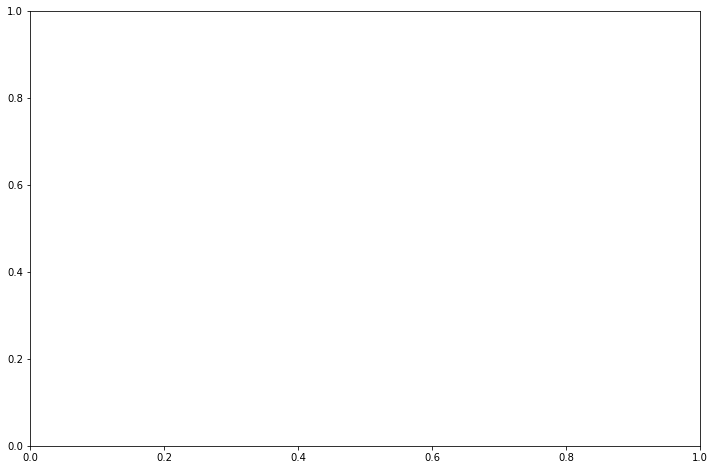

In [40]:
# fig 1 - using built-in xarray plotting
#fig = plt.figure(figsize=(12, 8))
#da.sel(time=slice('2015', '2100')).plot.line(x='time')
#plt.title('Projected Changes in Annual Total NBP', fontdict={'size':16})
#plt.ylabel('NBP'+' (' + da.attrs['units'] +')');


#can't figure out why I can't plot this... 

names = list(wtd_co2_ds.keys())
values = list(wtd_co2_ds.values())
print(len(names))
print(values)

fig = plt.figure(figsize=(12, 8))
#plt.bar(range(len(co2_globavg_ds)),values,tick_label=names)
plt.bar(len(names),values)

### To Do next
 - atm level for CO2 (looks like all are standardized at 19 levels)
 - decide what region (point, global, NH) to get data for, and figure out how to do the appropriate weighting
     - note: if just choosing 30N, perhaps the lat/lon weighting Katie tried is enough -- I don't need the 
 - what kind of figure to make? Annual cycle? or just a value?
 Maybe start with plotting annual cycle for all CMIP6 models N of 30N

In [ ]:
val  = co2_ds.get('CMIP.MRI.MRI-ESM2-0.historical.fx.gn')
print(val)